In [12]:
import numpy as np
from sklearn.decomposition import PCA

# dataset
X = np.array(
    [
        [-1, -1, 5],
        [-2, -1, 2],
        [-3, -2, 3],
        [21, 11, 1],
        [32, 10, 5],
        [37, 28, 6],
    ]
)

# pca
pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_ * 100

array([95.73317045,  3.61722631])

In [20]:
# studying: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition

np.random.seed(5)

# load iris dataset
iris = datasets.load_iris()

# create pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["label"] = df["target"].apply(lambda x: iris.target_names[x])
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [30]:
# pca
pca = decomposition.PCA(n_components=3)
pca.fit(df.iloc[:, 0:4])

# create new dataset with pca
df_pca = pd.DataFrame(pca.transform(df.iloc[:, 0:4]), columns=["A", "B", "C"])
df_pca[["target", "label"]] = df[["target", "label"]]
df_pca.tail()

,A,B,C,target,label
145,1.944110,0.187532,0.177825,2,virginica
146,1.527167,-0.375317,-0.121898,2,virginica
147,1.764346,0.078859,0.130482,2,virginica
148,1.900942,0.116628,0.723252,2,virginica
149,1.390189,-0.282661,0.362910,2,virginica


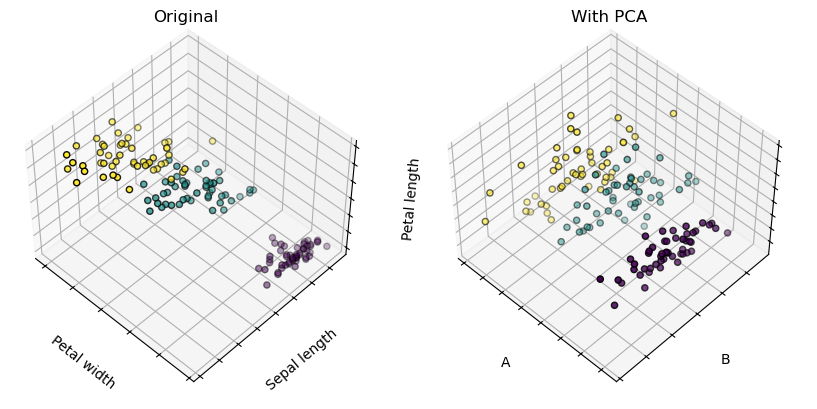

In [43]:
fig = plt.figure(1, figsize=(10, 6))

# plot original dataset
ax = fig.add_subplot(1, 2, 1, projection="3d", elev=48, azim=134)

ax.scatter(
    df["petal width (cm)"],
    df["sepal length (cm)"],
    df["petal length (cm)"],
    c=df["target"],
    edgecolor="k",
)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# set other labels and titles
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Original")

# plot dataset with pca
ax = fig.add_subplot(1, 2, 2, projection="3d", elev=48, azim=134)

ax.scatter(
    df_pca["A"],
    df_pca["B"],
    df_pca["C"],
    c=df_pca["target"],
    edgecolor="k",
)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_zlabel("C")
ax.set_title("With PCA")
plt.show()